In [1]:
import pandas as pd
import numpy as np

In [2]:
# This contains ALL our reporting experiment data, but includes some invalid data in 2019 due to faulty thresholds 
# filepath = "/data/databases/erroneous_reporting_experiment_data.csv"

# This is our main data-set
filepath = "/data/databases/reporting_experiment.csv"

df = pd.read_csv(filepath)

In [3]:
df.shape[0], df.dropna().shape[0]

(250423, 17767)

## Perspective API

In [304]:
pip install --upgrade google-api-python-client

  Using cached https://files.pythonhosted.org/packages/f6/a2/8fc0294407cc464edf26265a7d2ec8253fa40fd49c2e1b35e8c67648534e/google_api_python_client-1.12.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bd/4e/992849016f8b0c27fb604aafd0a7a724db16128906197bd1245c6f18e6a1/google_auth_httplib2-0.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1d/60/81e68e70eea91ef05bb00bcdac243d67b61f826c65aaca6961de622dffd7/google_auth-1.23.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b3/ad/d9d9331850ea5bd4f5cb8c650c0bfa119a4abd6b0ad7c45b6506bc979fc0/httplib2-0.18.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2e/3d/d7af13040ab5b259994a4434ff03d68084a994e709bc8afa4bee1235310e/google_api_core-1.23.0-py2.py3-none-any.whl
  Using cached htt

In [20]:
import requests
from googleapiclient import discovery

api_key = os.environ["VICTOR_PERSPECTIVE_API_KEY"]
service = discovery.build('commentanalyzer', 'v1alpha1', developerKey=api_key)

def get_resu
lts(request_id, response, exception):
    toxicity_scores.append((request_id, response))

count = 0
limit = 20
toxicity_scores = []
batch = service.new_batch_http_request(callback=get_results)

iteration = 0

for index, row in report.iterrows():
    analyze_request = {
      'comment': { 'text': row["body"]},
      'requestedAttributes': {'TOXICITY': {}}
    }
    count += 1
    
    batch.add(service.comments().analyze(body=analyze_request), request_id=str(count))
    
    if count >= limit:
        batch.execute()
        batch = service.new_batch_http_request(callback=get_results)
        count = 0
        print("Sleep #", iteration)
        iteration += 1
        time.sleep(60)
#         break

batch.execute()
print("Done")

Sleep # 0
Sleep # 1
Sleep # 2
Sleep # 3
Sleep # 4
Sleep # 5
Sleep # 6
Sleep # 7
Sleep # 8
Sleep # 9
Sleep # 10
Sleep # 11
Sleep # 12
Sleep # 13
Sleep # 14
Sleep # 15
Sleep # 16
Sleep # 17
Sleep # 18
Sleep # 19
Sleep # 20
Sleep # 21
Sleep # 22
Sleep # 23
Sleep # 24
Sleep # 25
Sleep # 26
Sleep # 27
Sleep # 28
Sleep # 29
Sleep # 30
Sleep # 31
Sleep # 32
Sleep # 33
Sleep # 34
Sleep # 35
Sleep # 36
Sleep # 37
Sleep # 38
Sleep # 39
Sleep # 40
Sleep # 41
Sleep # 42
Sleep # 43
Sleep # 44
Sleep # 45
Sleep # 46
Sleep # 47
Sleep # 48
Sleep # 49
Sleep # 50
Sleep # 51
Sleep # 52
Sleep # 53
Sleep # 54
Sleep # 55
Sleep # 56
Sleep # 57
Sleep # 59
Sleep # 60
Sleep # 61
Sleep # 62
Sleep # 63
Sleep # 64
Sleep # 65
Sleep # 66
Sleep # 67
Sleep # 68
Sleep # 69
Sleep # 70
Sleep # 71
Sleep # 72
Sleep # 73
Sleep # 74
Sleep # 75
Sleep # 76
Sleep # 77
Sleep # 78
Sleep # 79
Sleep # 80
Sleep # 81
Sleep # 82
Sleep # 83
Sleep # 84
Sleep # 85
Sleep # 86
Sleep # 87
Sleep # 88
Sleep # 89
Sleep # 90
Sleep # 91
Sleep # 9

In [23]:
toxicity = []
misses = 0
for i, row in report.iterrows():
    try:
        toxicity.append(toxicity_scores[i][1]['attributeScores']['TOXICITY']['summaryScore']['value'])
    except:
        print(i, "Messed up!")
        misses += 1
        toxicity.append(-1.0)

print(misses)
print(report.shape, len(toxicity))
print(toxicity)

8 Messed up!
1617 Messed up!
2341 Messed up!
2615 Messed up!
2692 Messed up!
2704 Messed up!
2757 Messed up!
2766 Messed up!
2800 Messed up!
2843 Messed up!
2868 Messed up!
2902 Messed up!
2953 Messed up!
2985 Messed up!
3136 Messed up!
3231 Messed up!
3250 Messed up!
3546 Messed up!
3610 Messed up!
3649 Messed up!
3737 Messed up!
3767 Messed up!
3856 Messed up!
3888 Messed up!
4093 Messed up!
4096 Messed up!
4148 Messed up!
4270 Messed up!
4275 Messed up!
4305 Messed up!
4422 Messed up!
4458 Messed up!
4465 Messed up!
4477 Messed up!
4514 Messed up!
4593 Messed up!
4626 Messed up!
4649 Messed up!
4668 Messed up!
4831 Messed up!
4857 Messed up!
4869 Messed up!
4932 Messed up!
4933 Messed up!
4961 Messed up!
5005 Messed up!
5306 Messed up!
5314 Messed up!
5350 Messed up!
5381 Messed up!
5414 Messed up!
5426 Messed up!
5459 Messed up!
5466 Messed up!
5489 Messed up!
5508 Messed up!
5554 Messed up!
5599 Messed up!
5873 Messed up!
5948 Messed up!
6042 Messed up!
6117 Messed up!
6190 Messed

48605 Messed up!
49062 Messed up!
49347 Messed up!
49357 Messed up!
49489 Messed up!
49518 Messed up!
49530 Messed up!
49584 Messed up!
49617 Messed up!
49670 Messed up!
49756 Messed up!
49868 Messed up!
49923 Messed up!
49935 Messed up!
49997 Messed up!
50008 Messed up!
50051 Messed up!
50228 Messed up!
50239 Messed up!
50247 Messed up!
50330 Messed up!
50417 Messed up!
50488 Messed up!
50490 Messed up!
50559 Messed up!
50726 Messed up!
50764 Messed up!
50860 Messed up!
50862 Messed up!
50871 Messed up!
50964 Messed up!
50970 Messed up!
50986 Messed up!
50994 Messed up!
51007 Messed up!
51020 Messed up!
51119 Messed up!
51389 Messed up!
51490 Messed up!
51500 Messed up!
51573 Messed up!
51679 Messed up!
51705 Messed up!
51753 Messed up!
51788 Messed up!
51796 Messed up!
51822 Messed up!
51923 Messed up!
51945 Messed up!
51993 Messed up!
52036 Messed up!
52057 Messed up!
52193 Messed up!
52280 Messed up!
52344 Messed up!
52528 Messed up!
52571 Messed up!
52601 Messed up!
52668 Messed u

94293 Messed up!
95352 Messed up!
95688 Messed up!
95736 Messed up!
95791 Messed up!
95957 Messed up!
96220 Messed up!
96313 Messed up!
96317 Messed up!
96522 Messed up!
96659 Messed up!
96791 Messed up!
97268 Messed up!
97283 Messed up!
97361 Messed up!
97533 Messed up!
97687 Messed up!
97724 Messed up!
97895 Messed up!
97896 Messed up!
97898 Messed up!
97933 Messed up!
98239 Messed up!
98285 Messed up!
98333 Messed up!
98340 Messed up!
98384 Messed up!
98477 Messed up!
98617 Messed up!
98626 Messed up!
98920 Messed up!
99042 Messed up!
99094 Messed up!
99271 Messed up!
99548 Messed up!
99699 Messed up!
99848 Messed up!
99888 Messed up!
100117 Messed up!
100411 Messed up!
100415 Messed up!
100443 Messed up!
100461 Messed up!
100491 Messed up!
100578 Messed up!
100645 Messed up!
100868 Messed up!
100914 Messed up!
100915 Messed up!
100956 Messed up!
101071 Messed up!
101110 Messed up!
101158 Messed up!
101320 Messed up!
101383 Messed up!
101436 Messed up!
101496 Messed up!
101498 Messe

147063 Messed up!
147315 Messed up!
147325 Messed up!
147411 Messed up!
147421 Messed up!
147458 Messed up!
147554 Messed up!
147648 Messed up!
147728 Messed up!
147758 Messed up!
147788 Messed up!
147949 Messed up!
147980 Messed up!
148141 Messed up!
148368 Messed up!
148485 Messed up!
148519 Messed up!
148638 Messed up!
148851 Messed up!
148928 Messed up!
148959 Messed up!
149079 Messed up!
149123 Messed up!
149183 Messed up!
149357 Messed up!
149382 Messed up!
149383 Messed up!
149447 Messed up!
149555 Messed up!
149565 Messed up!
149753 Messed up!
150038 Messed up!
150125 Messed up!
150282 Messed up!
150316 Messed up!
150383 Messed up!
150578 Messed up!
150851 Messed up!
150863 Messed up!
150865 Messed up!
150893 Messed up!
151156 Messed up!
151198 Messed up!
151251 Messed up!
151333 Messed up!
151705 Messed up!
151964 Messed up!
152067 Messed up!
152419 Messed up!
152428 Messed up!
152510 Messed up!
152564 Messed up!
152675 Messed up!
152857 Messed up!
152889 Messed up!
152980 Mes

211330 Messed up!
211433 Messed up!
211589 Messed up!
211630 Messed up!
211689 Messed up!
211694 Messed up!
211737 Messed up!
211938 Messed up!
211950 Messed up!
211984 Messed up!
212138 Messed up!
212297 Messed up!
212327 Messed up!
212364 Messed up!
212394 Messed up!
212396 Messed up!
212403 Messed up!
212531 Messed up!
212692 Messed up!
212814 Messed up!
212881 Messed up!
212913 Messed up!
213476 Messed up!
213896 Messed up!
214295 Messed up!
214297 Messed up!
214407 Messed up!
214853 Messed up!
214857 Messed up!
215294 Messed up!
215352 Messed up!
215754 Messed up!
216034 Messed up!
216088 Messed up!
216220 Messed up!
216324 Messed up!
216455 Messed up!
216543 Messed up!
216863 Messed up!
216933 Messed up!
217154 Messed up!
217571 Messed up!
217666 Messed up!
217676 Messed up!
217850 Messed up!
218101 Messed up!
218200 Messed up!
218382 Messed up!
218513 Messed up!
218544 Messed up!
218566 Messed up!
218850 Messed up!
219036 Messed up!
219136 Messed up!
219224 Messed up!
219570 Mes

In [8]:
full_perspective = df.copy()

In [ ]:
import json 
import requests 
import time
import os
counter = 0
p_toxicity_scores = []
p_severe_toxicity_scores = []
p_fast_toxicity_scores = []
p_identity_attack_scores = []
p_insult_scores = []
p_profanity_scores = []
p_threat_scores = []
p_sexually_scores = []
p_filtration_scores = []

def get_api_score(row):
    text = row["body"]
    api_key = os.environ["VICTOR_PERSPECTIVE_API_KEY"]
    url = ('https://commentanalyzer.googleapis.com/v1alpha1/comments:analyze' +    
        '?key=' + api_key)
    data_dict = {
        'comment': {'text': text},
        'languages': ['en'],
        'requestedAttributes': {
            'TOXICITY': {},
            'SEVERE_TOXICITY': {},
            'TOXICITY_FAST': {},
            'IDENTITY_ATTACK': {},
            'INSULT': {},
            'PROFANITY': {},
            'THREAT': {},
            'SEXUALLY_EXPLICIT': {},
            'FLIRTATION': {},
        }
    }
    response = requests.post(url=url, data=json.dumps(data_dict)) 
    response_dict = json.loads(response.content)
    time.sleep(1)
    global counter
    if counter % 100 == 0:
        print(counter)
    counter += 1
    try:
        p_toxicity_scores.append(response_dict["attributeScores"]["TOXICITY"]["summaryScore"]["value"])
        p_severe_toxicity_scores.append(response_dict["attributeScores"]["SEVERE_TOXICITY"]["summaryScore"]["value"])
        p_fast_toxicity_scores.append(response_dict["attributeScores"]["TOXICITY_FAST"]["summaryScore"]["value"])
        p_identity_attack_scores.append(response_dict["attributeScores"]["IDENTITY_ATTACK"]["summaryScore"]["value"])
        p_insult_scores.append(response_dict["attributeScores"]["INSULT"]["summaryScore"]["value"])
        p_profanity_scores.append(response_dict["attributeScores"]["PROFANITY"]["summaryScore"]["value"])
        p_threat_scores.append(response_dict["attributeScores"]["THREAT"]["summaryScore"]["value"])
        p_sexually_scores.append(response_dict["attributeScores"]["SEXUALLY_EXPLICIT"]["summaryScore"]["value"])
        p_filtration_scores.append(response_dict["attributeScores"]["FLIRTATION"]["summaryScore"]["value"])
    except:
        print(response_dict)
        p_toxicity_scores.append(-1)
        p_severe_toxicity_scores.append(-1)
        p_fast_toxicity_scores.append(-1)
        p_identity_attack_scores.append(-1)
        p_insult_scores.append(-1)
        p_profanity_scores.append(-1)
        p_threat_scores.append(-1)
        p_sexually_scores.append(-1)
        p_filtration_scores.append(-1)
    
for index, row in full_perspective.iterrows():
    get_api_score(row)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Google developer console API key', 'url': 'https://console.developers.google.com/project/229385371618/apiui/credential'}]}]}}
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'

22200
22300
22400
22500
22600
22700
22800
22900
23000
23100
23200
23300
23400
23500
23600
23700
23800
23900
24000
24100
24200
24300
24400
24500
24600
24700
24800
24900
25000
25100
25200
25300
25400
25500
25600
25700
25800
25900
26000
26100
26200
26300
26400
26500
26600
26700
26800
26900
27000
27100
27200
27300
27400
27500
27600
27700
27800
27900
28000
28100
28200
28300
28400
28500
28600
28700
28800
28900
29000
29100
29200
29300
29400
29500
29600
29700
29800
29900
30000
30100
30200
30300
30400
30500
30600
30700
30800
30900
31000
31100
31200
31300
31400
31500
31600
31700
31800
31900
32000
32100
32200
32300
32400
32500
32600
32700
32800
32900
33000
33100
33200
33300
33400
33500
33600
33700
33800
33900
34000
34100
34200
34300
34400
34500
34600
34700
34800
34900
35000
35100
35200
35300
35400
35500
35600
35700
35800
35900
36000
36100
36200
36300
36400
36500
36600
36700
36800
36900
37000
37100
37300
37400
37500
37600
37700
37800
37900
38000
38100
38200
38300
38400
38500
38600
38700
38800
3890

{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMIT_EXCEEDED', 'domain': 'googleapis.com', 'metadata': {'quota_limit': 'AnalyzeRequestsPerMinutePerProject', 'service': 'commentanalyzer.googleapis.com', 'consumer': 'projects/229385371618', 'quota_metric': 'CommentAnalyzerService/analyze_requests'}}]}}
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMIT_EXCE

{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMIT_EXCEEDED', 'domain': 'googleapis.com', 'metadata': {'quota_limit': 'AnalyzeRequestsPerMinutePerProject', 'service': 'commentanalyzer.googleapis.com', 'quota_metric': 'CommentAnalyzerService/analyze_requests', 'consumer': 'projects/229385371618'}}]}}
53000
53100
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RAT

55900
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMIT_EXCEEDED', 'domain': 'googleapis.com', 'metadata': {'quota_metric': 'CommentAnalyzerService/analyze_requests', 'service': 'commentanalyzer.googleapis.com', 'consumer': 'projects/229385371618', 'quota_limit': 'AnalyzeRequestsPerMinutePerProject'}}]}}
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMI

56200
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Google developer console API key', 'url': 'https://console.developers.google.com/project/229385371618/apiui/credential'}]}]}}
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Google developer console API key', 'url': 'https://console.developers.google.com/project/229385371618/apiui/credential'}]}

{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Google developer console API key', 'url': 'https://console.developers.google.com/project/229385371618/apiui/credential'}]}]}}
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Google developer console API key', 'url': 'https://console.developers.google.com/project/229385371618/apiui/credential'}]}]}}
57

{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMIT_EXCEEDED', 'domain': 'googleapis.com', 'metadata': {'quota_limit': 'AnalyzeRequestsPerMinutePerProject', 'quota_metric': 'CommentAnalyzerService/analyze_requests', 'service': 'commentanalyzer.googleapis.com', 'consumer': 'projects/229385371618'}}]}}
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMIT_EXCE

70100
70200
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMIT_EXCEEDED', 'domain': 'googleapis.com', 'metadata': {'quota_limit': 'AnalyzeRequestsPerMinutePerProject', 'quota_metric': 'CommentAnalyzerService/analyze_requests', 'service': 'commentanalyzer.googleapis.com', 'consumer': 'projects/229385371618'}}]}}
{'error': {'code': 429, 'message': "Quota exceeded for quota metric 'Analysis requests (AnalyzeComment)' and limit 'Analysis requests (AnalyzeComment) per minute' of service 'commentanalyzer.googleapis.com' for consumer 'project_number:229385371618'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RAT

In [15]:
full_perspective["p_toxicity_score"] = p_toxicity_scores
full_perspective["p_severe_toxicity_score"] = p_severe_toxicity_scores
full_perspective["p_fast_toxicity_score"] = p_fast_toxicity_scores
full_perspective["p_identity_attack_score"] = p_identity_attack_scores
full_perspective["p_insult_score"] = p_insult_scores
full_perspective["p_profanity_score"] = p_profanity_scores
full_perspective["p_threat_score"] = p_threat_scores
full_perspective["p_sexually_score"] = p_sexually_scores
full_perspective["p_filtration_score"] = p_filtration_scores

In [28]:
full_perspective.head()

,created_utc,ingested_utc,id,body,crossmod_action,author,subreddit,banned_by,banned_at_utc,agreement_score,...,parent_id,p_toxicity_score,p_severe_toxicity_score,p_fast_toxicity_score,p_identity_attack_score,p_insult_score,p_profanity_score,p_threat_score,p_sexually_score,p_filtration_score
0,2020-01-17 18:40:51.000000,2020-01-17 18:41:00.689344,fenk6u2,I think you dramatically underestimate how muc...,EMPTY,YWAK98alum,Futurology,NaN,NaN,0.07,...,t1_fen88ig,0.070674,0.032609,0.0,0.051961,0.035763,0.027541,0.236108,0.038831,0.294350
1,2020-01-22 19:37:11.000000,2020-01-22 19:37:19.446062,ff9uq86,> We have viable storage.\n\nSuch as? It isnt ...,EMPTY,Killerdude8,Futurology,NaN,NaN,0.05,...,t1_ff91z77,0.118112,0.035258,0.0,0.036935,0.114290,0.071067,0.057439,0.058810,0.296751
2,2020-01-22 19:37:22.000000,2020-01-22 19:37:29.571272,ff9uqpe,>Nope. They are about in the middle: \n> \n...,EMPTY,spadflyer12,Futurology,V2O5,2020-01-22 20:18:42.000000,0.06,...,t1_ff9p72i,0.570569,0.462327,0.0,0.521857,0.553851,0.719211,0.329936,0.484710,0.415118
3,2020-01-22 19:37:50.000000,2020-01-22 19:38:04.573010,ff9urzp,"Would’ve been the wind...""\n- Ref",EMPTY,GeorgeYDesign,Futurology,NaN,NaN,0.16,...,t1_ff9m7jb,0.051866,0.013409,0.0,0.017888,0.035912,0.017214,0.039793,0.027607,0.308613
4,2020-01-22 19:39:29.000000,2020-01-22 19:39:46.244155,ff9uwfx,I understand. And if it would lead to people e...,EMPTY,Noorieke,Futurology,NaN,NaN,0.07,...,t3_esbw2z,0.050886,0.014591,0.0,0.018970,0.033882,0.021968,0.024797,0.010282,0.246566


In [118]:
full_perspective[full_perspective["crossmod_action"] == "report"]

,created_utc,ingested_utc,id,body,crossmod_action,author,subreddit,banned_by,banned_at_utc,agreement_score,...,parent_id,p_toxicity_score,p_severe_toxicity_score,p_fast_toxicity_score,p_identity_attack_score,p_insult_score,p_profanity_score,p_threat_score,p_sexually_score,p_filtration_score
8,2020-01-22 19:43:09.000000,2020-01-22 19:43:13.507499,ff9v6x7,Excuuuuuse me for not knowing EVERYTHING like ...,report,MeatsackKY,Futurology,NaN,NaN,0.90,...,t1_ff9hun1,0.960198,0.808631,0.983556,0.290568,0.731389,0.967431,0.565352,0.987229,0.848758
480,2020-01-23 02:14:03.000000,2020-01-23 02:14:20.406346,ffavsli,No one cares that you’re a bad person AND unfa...,report,WaterySeamen,Futurology,NaN,NaN,0.92,...,t1_ff6bzl4,0.660660,0.221310,0.001442,0.148368,0.755660,0.237148,0.071416,0.068852,0.231186
518,2020-01-23 02:42:12.000000,2020-01-23 02:42:24.982265,ffaycey,Keep breeding you cunts!,report,Suchaputz,Futurology,lughnasadh,2020-01-23 18:36:20.000000,0.86,...,t3_esiofj,0.959148,0.841684,0.982893,0.348111,0.806133,0.968870,0.499938,0.971491,0.717718
673,2020-01-23 04:19:42.000000,2020-01-23 04:19:50.950950,ffb6lsu,Get the fuck out nazi,report,ZonkErryday,Futurology,lughnasadh,2020-01-23 18:33:13.000000,0.87,...,t1_ffb5x26,0.967988,0.874279,0.999901,0.903107,0.880757,0.968870,0.509573,0.683611,0.311122
917,2020-01-23 06:37:28.000000,2020-01-23 06:37:35.760920,ffbe5g5,You're in denial or you're fucking clueless,report,GunnyH1GHway,Futurology,lughnasadh,2020-01-23 18:36:03.000000,0.88,...,t1_ff5yhkx,0.969731,0.784798,0.999272,0.432564,0.922866,0.975086,0.140747,0.217690,0.146835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249943,2020-05-26 01:01:39.000000,2020-05-26 01:01:52.089560,frtp0ik,Fucking corporate America,report,Bigjerr2007,Futurology,NaN,NaN,0.89,...,t3_gqmari,0.974058,0.800265,0.985721,0.745023,0.805761,0.983426,0.132316,0.740741,0.222654
249977,2020-05-26 01:32:53.000000,2020-05-26 01:33:00.287258,frts5wn,"Reddit's biggest flaw, mods are gay. Nice user...",report,choppedtrees,Futurology,NaN,NaN,0.95,...,t1_frtrcwk,0.835521,0.471733,0.008757,0.924559,0.774462,0.564225,0.083884,0.294361,0.284033
249994,2020-05-26 01:55:49.000000,2020-05-26 01:56:02.856299,frtufyf,R u d e,report,qpw8u4q3jqf,Futurology,NaN,NaN,0.89,...,t1_frtn82l,0.168686,0.080345,0.031359,0.087242,0.134320,0.131747,0.211302,0.168182,0.348708
250266,2020-05-26 03:58:22.000000,2020-05-26 03:58:33.898248,fru5wzl,imagine being this weak willed. ofcourse we're...,report,AntiSocialInjustice,Futurology,NaN,NaN,0.90,...,t1_fru3tjs,0.949928,0.866256,0.998974,0.549839,0.895227,0.958935,0.953325,0.340283,0.282246


# Plots & Statistics

In [61]:
print("# all comments: ", full_perspective.shape[0])
# after removing filtered data
full_perspective_original = full_perspective
full_perspective = full_perspective[(full_perspective["agreement_score"] != -1) & (full_perspective["p_toxicity_score"] != -1)]
print("# filtered comments: ", full_perspective.shape[0])


# all comments:  247025
# filtered comments:  247025


### General Toxicity Metrics 

Text(0.5, 1.0, 'Toxicity Score - Agreement score')

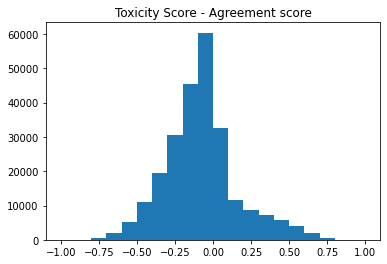

In [62]:
import matplotlib.pyplot as plt
plt.hist((full_perspective["p_toxicity_score"] - full_perspective["agreement_score"]), bins=20, range=(-1, 1))
plt.title("Toxicity Score - Agreement score")

In [105]:
threshold = 0.8
fp = full_perspective[(full_perspective["p_toxicity_score"] < threshold) & (full_perspective["agreement_score"] >= threshold)]
fn = full_perspective[(full_perspective["p_toxicity_score"] >= threshold) & (full_perspective["agreement_score"] < threshold)]
print("# Comments: ", full_perspective.shape[0])
print("# False Positive Comments: ", fp.shape[0], fp.shape[0] / full_perspective.shape[0])
print("# False Negative Comments: ", fn.shape[0], fn.shape[0] / full_perspective.shape[0])

# Comments:  247025
# False Positive Comments:  1868 0.007561987653071552
# False Negative Comments:  12227 0.04949701447221941


In [106]:
fp = full_perspective[(full_perspective["p_toxicity_score"] < threshold) & (full_perspective["agreement_score"] >= threshold) & (full_perspective["p_toxicity_score"] > threshold)]
fn = full_perspective[(full_perspective["p_toxicity_score"] >= threshold) & (full_perspective["agreement_score"] < threshold) & (full_perspective["p_toxicity_score"] >= threshold)]
print("# Perspective-reported Comments: ", full_perspective[full_perspective["p_toxicity_score"] > threshold].shape[0])
print("# False Positive Comments: ", fp.shape[0], fp.shape[0] / full_perspective[full_perspective["p_toxicity_score"] > threshold].shape[0])
print("# False Negative Comments: ", fn.shape[0], fn.shape[0] / full_perspective[full_perspective["p_toxicity_score"] > threshold].shape[0])

# Perspective-reported Comments:  15121
# False Positive Comments:  0 0.0
# False Negative Comments:  12227 0.8086105416308446


Text(0, 0.5, 'Ratio of True Positive')

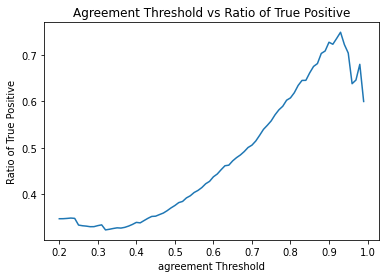

In [99]:
def ratio_of_true_positives(agreement_score_threshold):
    true_positives = full_perspective[(full_perspective["agreement_score"] >= agreement_score_threshold) & (full_perspective["p_toxicity_score"] >= agreement_score_threshold)].shape[0] 
    total_at_threshold =full_perspective[(full_perspective["agreement_score"] >= agreement_score_threshold)].shape[0]
    return true_positives / total_at_threshold
agreement_scores = [i / 100 for i in range(20, 100)]
ratios = [ratio_of_true_positives(i) for i in agreement_scores]
plt.plot(agreement_scores, ratios)
plt.title("Agreement Threshold vs Ratio of True Positive")
plt.xlabel("agreement Threshold")
plt.ylabel("Ratio of True Positive")

In [116]:
fp = full_perspective[(full_perspective["p_toxicity_score"] >= threshold) & (full_perspective["banned_by"].isnull())]
fn = full_perspective[(full_perspective["p_toxicity_score"] < threshold) & (full_perspective["banned_by"].notnull())]
print("# Human report: ", full_perspective[full_perspective["banned_by"].notnull()].shape[0])
print("# perspective remove: ", full_perspective[full_perspective["p_toxicity_score"] >= threshold].shape[0])
print("# Human not report but perspective remove: ", fp.shape[0])
print("# Human report but perspective not remove: ", fn.shape[0])

# Human report:  17561
# perspective remove:  15121
# Human not report but perspective remove:  11625
# Human report but perspective not remove:  14065


### All Metrics

Text(0.5, 1.0, 'Filtration')

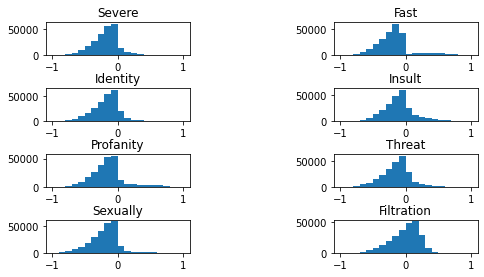

In [94]:
plt.subplots_adjust(wspace = 1, hspace = 1, left = 0, right = 1, bottom = 0.1, top = 0.9)
plt.subplot(4, 2, 1)
plt.hist((full_perspective["p_severe_toxicity_score"] - full_perspective["agreement_score"]), bins=20, range=(-1, 1))
plt.title("Severe")
plt.subplot(4, 2, 2)
plt.hist((full_perspective["p_fast_toxicity_score"] - full_perspective["agreement_score"]), bins=20, range=(-1, 1))
plt.title("Fast")
plt.subplot(4, 2, 3)
plt.hist((full_perspective["p_identity_attack_score"] - full_perspective["agreement_score"]), bins=20, range=(-1, 1))
plt.title("Identity")
plt.subplot(4, 2, 4)
plt.hist((full_perspective["p_insult_score"] - full_perspective["agreement_score"]), bins=20, range=(-1, 1))
plt.title("Insult")
plt.subplot(4, 2, 5)
plt.hist((full_perspective["p_profanity_score"] - full_perspective["agreement_score"]), bins=20, range=(-1, 1))
plt.title("Profanity")
plt.subplot(4, 2, 6)
plt.hist((full_perspective["p_threat_score"] - full_perspective["agreement_score"]), bins=20, range=(-1, 1))
plt.title("Threat")
plt.subplot(4, 2, 7)
plt.hist((full_perspective["p_sexually_score"] - full_perspective["agreement_score"]), bins=20, range=(-1, 1))
plt.title("Sexually")
plt.subplot(4, 2, 8)
plt.hist((full_perspective["p_filtration_score"] - full_perspective["agreement_score"]), bins=20, range=(-1, 1))
plt.title("Filtration")

### Score - agreement_score
more false negative, less false positive

Text(0.5, 1.0, 'Fast Toxicity Score - Agreement score')

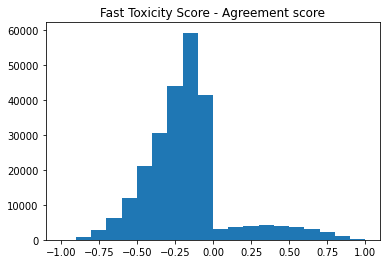